<a href="https://colab.research.google.com/github/TheRealChichi/Deep-Learning-With-Python/blob/main/Binary_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Binary classifier**

Predict the sentiment of IMDB reviews (negative or positive)

**Import libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import models, layers, optimizers, losses, metrics
from tensorflow.keras.datasets import imdb

**Get datasets**

In [ ]:
LIMIT_WORD = 1000

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=LIMIT_WORD)

In [ ]:
def convert_to_english(sequence):
  word_index = imdb.get_word_index()
  reverse_word_index = dict(
      [(value, key) for (key,value) in word_index.items()]
  )
  decoded_review = " ".join(
      [reverse_word_index.get(i - 3, '?') for i in sequence])
  return decoded_review

In [ ]:
print(convert_to_english(train_data[0]))

? this film was just brilliant casting ? ? story direction ? really ? the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same ? ? as myself so i loved the fact there was a real ? with this film the ? ? throughout the film were great it was just brilliant so much that i ? the film as soon as it was released for ? and would recommend it to everyone to watch and the ? ? was amazing really ? at the end it was so sad and you know what they say if you ? at a film it must have been good and this definitely was also ? to the two little ? that played the ? of ? and paul they were just brilliant children are often left out of the ? ? i think because the stars that play them all ? up are such a big ? for the whole film but these children are amazing and should be ? for what they have done don't you think the whole story was so ? because it was true and was ? life after all that was ? with us all


**Prepare the data (convert sequences into tensors)**

In [ ]:
def vectorize_sequences(sequences, dimension=LIMIT_WORD):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1

  return results

**Vectorize examples**

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Vectorize labels**

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
y_train[0]

1.0

**Building the network**

Architecture

*   2 intermediate Dense layers with 16 hidden unites per each (relu activation function)
*   1 ouput layer (sigmoid activation function)




In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (LIMIT_WORD,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation= 'sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Compile**

**Loss function**: binary crossentropy
**Optimizer**: rmsprop

In [ ]:
model.compile(
    optimizer = optimizers.RMSprop(0.001),
    loss = losses.binary_crossentropy,
    metrics=[metrics.binary_accuracy]
)

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size = 512,
    validation_data=(x_val,y_val)
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - binary_accuracy: 0.6104 - loss: 0.6643 - val_binary_accuracy: 0.7945 - val_loss: 0.5046
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - binary_accuracy: 0.8061 - loss: 0.4673 - val_binary_accuracy: 0.8309 - val_loss: 0.4026
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - binary_accuracy: 0.8459 - loss: 0.3782 - val_binary_accuracy: 0.8326 - val_loss: 0.3824
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - binary_accuracy: 0.8606 - loss: 0.3378 - val_binary_accuracy: 0.8517 - val_loss: 0.3510
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - binary_accuracy: 0.8693 - loss: 0.3164 - val_binary_accuracy: 0.8541 - val_loss: 0.3465
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - binary_accuracy: 0.8732 - loss: 0.3068 - val_binary_accuracy: 0.8573 - val_loss: 0.3374
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - binary_accuracy: 0.8860 - loss: 0.2879 - val_binary_accuracy: 0.8575 - val_loss: 0.3474
Epoch 8/20
30/30 ━━

**Plot results**

Training and validation loss

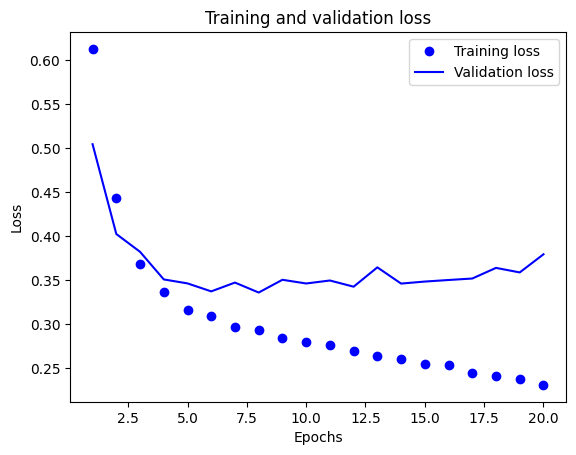

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['binary_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
print(sum(acc)/len(acc))

0.8728933274745941


In [ ]:
history_dict.keys()

dict_keys(['binary_accuracy', 'loss', 'val_binary_accuracy', 'val_loss'])

**Training and validation accuracy**

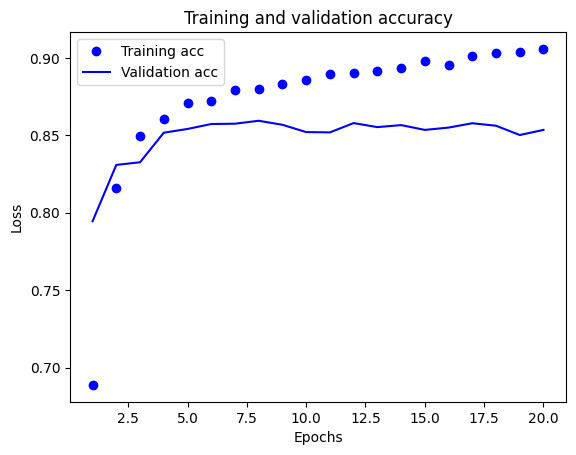

In [ ]:
plt.clf()

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

***Display above we have an example of overfitting. To prevent it, in this case could be sufficient to train the network for 4 epochs***

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (LIMIT_WORD,)))
model.add(layers.Dense(16, activation = 'relu',))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(
    optimizer = optimizers.RMSprop(0.001),
    loss = losses.binary_crossentropy,
    metrics = [metrics.binary_accuracy]
)

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - binary_accuracy: 0.6700 - loss: 0.6023
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - binary_accuracy: 0.8393 - loss: 0.3855
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - binary_accuracy: 0.8622 - loss: 0.3322
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - binary_accuracy: 0.8684 - loss: 0.3150
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - binary_accuracy: 0.8602 - loss: 0.3293


In [ ]:
print(results)

[0.32653242349624634, 0.8609600067138672]


In [ ]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0.35870132],
       [0.9925449 ],
       [0.50262195],
       ...,
       [0.08268564],
       [0.10965794],
       [0.3339565 ]], dtype=float32)